<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/czyzewska/Systemy_rekomendacyjne_cz2_21_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mixtend
import pandas as pd

ERROR: Could not find a version that satisfies the requirement mixtend (from versions: none)
ERROR: No matching distribution found for mixtend


In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('GroceryStoreDataSet.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [5]:
def correct_df_items(df):
    corrections = {'COCK': 'CHEESE', 'SUGER': 'SUGAR'}
    df['products'] = df['products'].replace(corrections, regex=True)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df = pd.read_csv('GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df = correct_df_items(df)
print(df.shape)
df.head(5)

(20, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [7]:
df.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


products                        
BREAD,TEA,BOURNVITA                 2
COFFEE,CHEESE,BISCUIT,CORNFLAKES    2
BREAD,COFFEE,SUGAR                  2
BREAD,COFFEE,CHEESE                 1
JAM,MAGGI,BREAD,MILK                1
MILK,BREAD,BISCUIT                  1
MAGGI,TEA,CORNFLAKES                1
MAGGI,TEA,BISCUIT                   1
MAGGI,BREAD,TEA,BISCUIT             1
JAM,MAGGI,BREAD,TEA                 1
COFFEE,SUGAR,BOURNVITA              1
COFFEE,SUGAR,CORNFLAKES             1
BREAD,SUGAR,BOURNVITA               1
BREAD,SUGAR,BISCUIT                 1
BREAD,MILK,BISCUIT,CORNFLAKES       1
BREAD,MILK                          1
TEA,MILK,COFFEE,CORNFLAKES          1
Name: count, dtype: int64

In [8]:
data = list(df['products'].apply(lambda x:x.split(',')))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'CHEESE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'CHEESE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGAR', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'CHEESE'],
 ['BREAD', 'SUGAR', 'BISCUIT'],
 ['COFFEE', 'SUGAR', 'CORNFLAKES'],
 ['BREAD', 'SUGAR', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGAR'],
 ['BREAD', 'COFFEE', 'SUGAR'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [9]:
te = TransactionEncoder()

data_encoded = te.fit(data).transform(data)
df_bool = pd.DataFrame(data_encoded, columns=te.columns_)
df_bool.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,CHEESE,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [10]:
df_encoded = df_bool.astype(int)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,CHEESE,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [11]:
from mlxtend.frequent_patterns import apriori

support = apriori(df_bool, min_support=0.15, use_colnames=True).sort_values(by='support', ascending = False)
support
#najczęściej kupowany chlep 65%, najczęstsze połączenie mleko i chleb 20%

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
9,0.35,(TEA)
5,0.30,(CORNFLAKES)
8,0.30,(SUGAR)
6,0.25,(MAGGI)
7,0.25,(MILK)
15,0.20,"(MILK, BREAD)"
20,0.20,"(COFFEE, SUGAR)"


In [12]:
conf = association_rules(support, metric='zhangs_metric', min_threshold=0.15).sort_values(by='zhangs_metric', ascending=False)
conf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(COFFEE),(CHEESE),0.40,0.15,0.15,0.375000,2.500000,0.0900,1.360000,1.000000
6,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.750000,0.865385
7,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.250000,0.750000
10,(CHEESE),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882
2,(COFFEE),(SUGAR),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
5,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
3,(SUGAR),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
4,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
1,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714
13,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538


In [13]:
conf_2 = association_rules(support, metric="confidence",min_threshold=0.15).sort_values(by='zhangs_metric')
conf_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(BREAD),(COFFEE),0.65,0.40,0.15,0.230769,0.576923,-0.1100,0.780000,-0.676923
17,(COFFEE),(BREAD),0.40,0.65,0.15,0.375000,0.576923,-0.1100,0.560000,-0.550000
7,(BREAD),(TEA),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
12,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
15,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308
6,(TEA),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
13,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
14,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
9,(SUGAR),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000,0.035714
8,(BREAD),(SUGAR),0.65,0.30,0.20,0.307692,1.025641,0.0050,1.011111,0.071429


### Rekomendacja Filmów

In [14]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
ratings.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies.head(4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [17]:
data = pd.merge(ratings, movies, on='movieId')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Sprawdź:
- Liczbę wszystkich ocen
- Liczbę filmów w bazie
- Liczbę użytkowników
- Średnią liczbę ocen na użytkownika
- Średnią liczbę ocen na film
- Rozkład ocen

In [19]:
#liczba wszystkich ocen
num_ratings= data['rating'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Liczba filmów w bazie
num_movies = data['title'].nunique()
num_movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9719

In [31]:
duplicated_titles = data[data.duplicated(subset=['title'], keep=False)]['title'].unique()
duplicated_titles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)', ...,
       'Blow-Out (La grande bouffe) (1973)', 'Misfits, The (1961)',
       'Cotton Club, The (1984)'], dtype=object)

In [33]:
# Liczbę użytkowników
num_users =data['userId'].nunique()
num_users

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


610

In [34]:
# Średnią liczbę ocen na użytkownika
mean = num_ratings/num_users
mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165.30491803278687

In [24]:
# Średnia liczba ocen na film
mean_by_movie = num_ratings/num_movies
mean_by_movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.375141475460438

In [38]:
# Rozkład ocen
total_ratings = len(ratings)
ratings_distribution = ratings['rating'].value_counts().sort_index()
print("Rozkład ocen:")
print(ratings_distribution)

Rozkład ocen:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#najczęsciej oceniany film
ratings_count = data.groupby('title').size()
most_rated_movie = ratings_count.idxmax()

most_rated_movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Forrest Gump (1994)'

In [41]:
# Stwórz słowniki – zwracające tyluł filmu po jego id
movie_titles = dict(zip(movies['movieId'],movies['title']))
# movie_titles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# C to średnia liczba ocen
# m reprezentuje średnią ocenę wszystkich filmów

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
c= data['rating'].count()/data['title'].count()
c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [91]:
movie_titles = dict(zip(movies['movieId'],movies['title']))
C = ratings['rating'].count().mean()
m = ratings['rating'].mean()

def bayesian_avg(ratings):
  bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
  return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movies_with_bayesian = movies.merge(bayesian_avg_ratings, on='movieId')

print("\n5 wierszy danych o filmach z wartością średniej oceny bayesowskiej:")
print(movies_with_bayesian.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



5 wierszy danych o filmach z wartością średniej oceny bayesowskiej:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  bayesian_avg  
0  Adventure|Animation|Children|Comedy|Fantasy      3.502449  
1                   Adventure|Children|Fantasy      3.501481  
2                               Comedy|Romance      3.501432  
3                         Comedy|Drama|Romance      3.501478  
4                                       Comedy      3.501348  


In [92]:
from scipy.sparse import csr_matrix

def create_sparse(df):
  M = df['userId'].nunique()
  N = df['movieId'].nunique()
  user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
  user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
  user_index = [user_mapper[i] for i in df['userId']]
  item_index = [movie_mapper[i] for i in df['movieId']]
  X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))
  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Tworzenie rzadkiej macierzy
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_sparse(data)

# Obliczanie sparsji
n_total = X.shape[0] * X.shape[1]
n_ratings = X.nnz  # liczba zapisanych wartości, w tym jawnych zer
sparsity = n_ratings / n_total
sparsity_p = round(sparsity * 100, 2)
print(f"Matrix sparsity: {sparsity_p}%")

# Liczba ocen na użytkownika
n_ratings_per_user = X.getnnz(axis=1)
print("Liczba ocen na użytkownika:", n_ratings_per_user)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'DatasetAutoFolds' object is not subscriptable

In [ ]:
import scipy.sparse as sp

# Obliczenie liczby wszystkich możliwych ocen (łącznie z ocenami równymi zero)
n_total = X.shape[0] * X.shape[1]

# Obliczenie liczby ocenanych wartości (niezerowych) w macierzy rzadkiej
n_ratings = X.nnz

# Obliczenie rzadkości (sparsity) macierzy
sparsity = n_ratings / n_total
sparsity_p = round(sparsity * 100, 2)

print(f"Matrix sparsity: {sparsity_p}%")

# Obliczenie liczby ocen na użytkownika
n_ratings_per_user = X.getnnz(axis=1)

10 filmów rekomendownych po Toy Story


In [94]:
# Obliczanie podobieństwa kosinusowego między filmami
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X.T)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
movie_id = 1
movie_index = movie_mapper[movie_id]
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
similar_movies_ids = [movie_inv_mapper[i[0]] for i in similar_movies[1:11]]  # Pomijamy pierwszy film, bo to ten sam film

# Wyświetlanie tytułów 10 najbardziej podobnych filmów
recommended_movies = movies[movies['movieId'].isin(similar_movies_ids)]
print("10 filmów podobnych do filmu o ID 1:")
print(recommended_movies[['movieId', 'title']])

10 filmów podobnych do filmu o ID 1:
      movieId                                              title
224       260          Star Wars: Episode IV - A New Hope (1977)
314       356                                Forrest Gump (1994)
322       364                              Lion King, The (1994)
418       480                               Jurassic Park (1993)
546       648                         Mission: Impossible (1996)
615       780               Independence Day (a.k.a. ID4) (1996)
911      1210  Star Wars: Episode VI - Return of the Jedi (1983)
964      1265                               Groundhog Day (1993)
969      1270                          Back to the Future (1985)
2355     3114                                 Toy Story 2 (1999)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Część 2

In [96]:
!pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD,KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# 1. Podaj liczbę filmów dla dzieci
children_movies = movies[movies['genres'].str.contains("Children")]
num_children_movies = len(children_movies)
print(f"Liczba filmów dla dzieci: {num_children_movies}")

Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\('
<>:2: DeprecationWarning: invalid escape sequence '\('
<ipython-input-99-0d86365efa62>:2: DeprecationWarning: invalid escape sequence '\('
  movies_1995 = movies[movies['title'].str.contains("\(1995\)")]


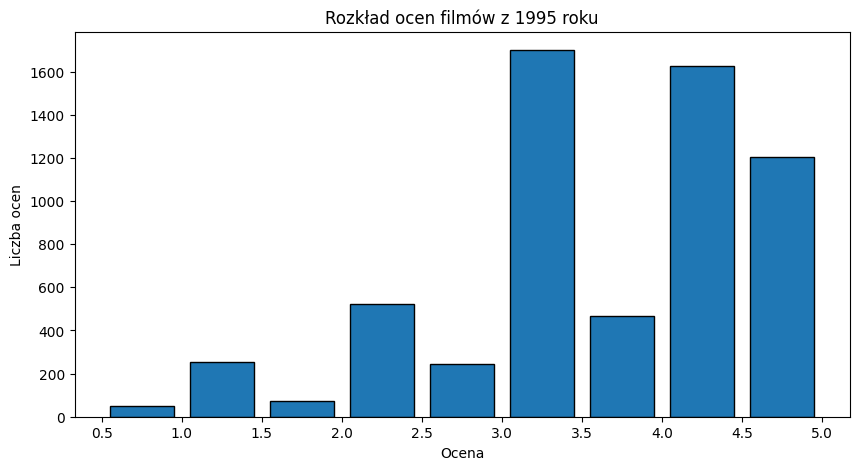

In [99]:
#2. Pokaż rozkład ocen filmów z 1995
movies_1995 = movies[movies['title'].str.contains("\(1995\)")]
movies_1995_ids = movies_1995['movieId'].tolist()
ratings_1995 = ratings[ratings['movieId'].isin(movies_1995_ids)]

plt.figure(figsize=(10, 5))
counts, bins = np.histogram(ratings_1995['rating'], bins=np.arange(0.5, 5.5, 0.5))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.bar(bin_centers, counts, width=0.4, edgecolor='black')  # Width jest mniejszy niż szerokość binu
plt.title('Rozkład ocen filmów z 1995 roku')
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

In [100]:
# 3. Podaj średnią ocen wszystkich filmów akcji oraz 3 najwyżej oceniane filmy
action_movies = movies[movies['genres'].str.contains("Action")]
action_movies_ids = action_movies['movieId'].tolist()
ratings_action = ratings[ratings['movieId'].isin(action_movies_ids)]

avg_rating_action = ratings_action['rating'].mean()
print(f"Średnia ocena wszystkich filmów akcji: {avg_rating_action:.2f}")

Średnia ocena wszystkich filmów akcji: 3.45


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
# Średnie oceny filmów akcji
avg_ratings_per_action_movie = ratings_action.groupby('movieId')['rating'].mean()
top_3_action_movies = avg_ratings_per_action_movie.sort_values(ascending=False).head(3).index
top_3_action_movies_titles = movies[movies['movieId'].isin(top_3_action_movies)][['movieId', 'title']]
print("Top 3 najwyżej oceniane filmy akcji:")
print(top_3_action_movies_titles)

Top 3 najwyżej oceniane filmy akcji:
      movieId                                              title
7174    72142             Love Exposure (Ai No Mukidashi) (2008)
8551   115727  Crippled Avengers (Can que) (Return of the 5 D...
8982   138632                                 Tokyo Tribe (2014)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# Get minimum and maximum rating from thedataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating,
max_rating))
data = Dataset.load_from_df(ratings[['userId','movieId', 'rating']], reader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
from surprise.model_selection import train_test_split
trainset, testset  = train_test_split(data, test_size = 0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
algo = SVD()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:

# cross_validate(algo, struktura_danych,measures=[metryki_błędów], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
algo.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
predictions = algo.test(testset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
from surprise import accuracy
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8766


0.8766343424318573

In [72]:
#zrobić

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
